# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model/'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_noemlines.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summ_noemlines.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

# Posteriors

In [5]:
posteriors

,beta[1],beta[2],beta[3],beta[4],beta[5]
0,-3.685708,32.610873,-68.358126,-0.039401,-0.028859
1,-3.679616,30.225845,-60.233817,-0.089985,0.062002
2,-3.479198,30.017847,-63.905318,-0.093453,0.063950
3,-4.063318,29.893671,-49.725777,-0.111552,0.100827
4,-2.742927,24.280441,-56.647008,0.046149,0.064127
5,-2.754137,24.960116,-54.459282,0.047867,0.063602
6,-2.980657,22.040077,-36.420121,0.044529,0.098178
7,-2.091041,10.732868,-7.811155,-0.064943,0.002874
8,-1.445604,9.527786,-15.685227,-0.018466,0.020789
9,-1.600843,15.171928,-33.574333,0.154544,-0.062451


In [6]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [7]:
# dimensions = posteriors.columns.values.reshape(5,5)
# rows       = dimensions[:,0].size
# columns    = dimensions[0,:].size

In [8]:
# plt.subplots(figsize=figsize)
# position = 1
# for each_beta in range(rows):
#     for each_class in range(columns):
#         name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
#         plot_temp = plt.subplot(rows, columns, position)
#         sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
#         plt.legend(loc='upper right', fontsize=15)
#         plt.axvline(x=0, linestyle="--", color='black')
#         plt.xlabel(r"%s" % str(name_temp), fontsize=20)
#         plt.tick_params('both', labelsize='20')
#         plt.xlim([-1.5,1.5])
#         plt.ylim([0,4.5])      
#         if (each_class==0):
#             plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
#         elif (each_class!=0): 
#             plot_temp.yaxis.set_visible(False)            
#         position+=1

# plt.tight_layout()
# plt.savefig(os.path.join(results_path, '25betas_shared_revised.png'), bbox_inch='tight')
# plt.savefig(os.path.join(results_path, '25betas_shared_revised.pdf'), bbox_inch='tight')
# plt.show()

# Simplifying the probabilities' dataframe

In [9]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_noemlines.csv'))

In [10]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1]', 'beta[2]', 'beta[3]', 'beta[4]',
       'beta[5]', 'eta[1]', 'eta[2]',
       ...
       'pnew[898]', 'pnew[899]', 'pnew[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=2319)

In [11]:
header = np.array(entire_fit.keys())
header

array(['chain', 'draw', 'warmup', ..., 'n_leapfrog__', 'divergent__',
       'energy__'], dtype=object)

In [12]:
# entire_fit

In [23]:
prob_keys = []
for i in header:
    if i[0:4]=='pnew':
        prob_keys.append(i)
    else:
        continue

In [24]:
probabilities = entire_fit[prob_keys]

In [25]:
probabilities

,pnew[1],pnew[2],pnew[3],pnew[4],pnew[5],pnew[6],pnew[7],pnew[8],pnew[9],pnew[10],...,pnew[891],pnew[892],pnew[893],pnew[894],pnew[895],pnew[896],pnew[897],pnew[898],pnew[899],pnew[900]
0,0.126991,0.153326,0.182061,0.212668,0.244499,0.276838,0.308956,0.340158,0.369828,0.397452,...,0.463389,0.454333,0.442152,0.426912,0.408718,0.387732,0.364192,0.338417,0.310823,0.281917
1,0.254665,0.295998,0.338445,0.381003,0.422720,0.462770,0.500491,0.535407,0.567217,0.595775,...,0.577493,0.573162,0.566056,0.556145,0.543397,0.527787,0.509309,0.487992,0.463917,0.437237
2,0.293897,0.337098,0.380384,0.422741,0.463294,0.501353,0.536426,0.568214,0.596579,0.621506,...,0.552968,0.543401,0.530827,0.515232,0.496620,0.475037,0.450589,0.423458,0.393925,0.362383
3,0.265750,0.310612,0.357203,0.404419,0.451171,0.496478,0.539534,0.579746,0.616731,0.650302,...,0.686204,0.693293,0.698338,0.701393,0.702491,0.701644,0.698843,0.694057,0.687235,0.678305
4,0.286091,0.318772,0.350923,0.381984,0.411474,0.439004,0.464280,0.487095,0.507318,0.524877,...,0.579867,0.565983,0.549374,0.530018,0.507925,0.483156,0.455842,0.426199,0.394546,0.361305
5,0.293325,0.328580,0.363520,0.397522,0.430045,0.460654,0.489018,0.514911,0.538195,0.558805,...,0.654482,0.645628,0.634316,0.620459,0.603970,0.584772,0.562811,0.538071,0.510598,0.480520
6,0.289317,0.323688,0.358506,0.393257,0.427456,0.460671,0.492537,0.522766,0.551146,0.577536,...,0.754396,0.759121,0.762553,0.764729,0.765672,0.765392,0.763887,0.761139,0.757119,0.751786
7,0.235626,0.252742,0.270373,0.288459,0.306934,0.325730,0.344774,0.363991,0.383308,0.402648,...,0.506538,0.522415,0.537885,0.552920,0.567502,0.581612,0.595238,0.608370,0.621005,0.633138
8,0.348080,0.364138,0.379814,0.395043,0.409769,0.423943,0.437522,0.450468,0.462754,0.474353,...,0.518454,0.521299,0.523412,0.524794,0.525443,0.525362,0.524549,0.523005,0.520729,0.517719
9,0.147632,0.160588,0.173546,0.186363,0.198895,0.211004,0.222556,0.233429,0.243507,0.252689,...,0.508739,0.502219,0.494129,0.484475,0.473268,0.460528,0.446288,0.430596,0.413519,0.395148


In [26]:
probabilities_transposed = probabilities.T

In [27]:
print(probabilities_transposed.columns)

RangeIndex(start=0, stop=40000, step=1)


In [28]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

40000


In [29]:
probabilities_transposed.columns = new_header

In [30]:
probabilities_transposed

,itr0,itr1,itr2,itr3,itr4,itr5,itr6,itr7,itr8,itr9,...,itr39990,itr39991,itr39992,itr39993,itr39994,itr39995,itr39996,itr39997,itr39998,itr39999
pnew[1],0.126991,0.254665,0.293897,0.265750,0.286091,0.293325,0.289317,0.235626,0.348080,0.147632,...,0.441923,0.333756,0.311940,0.239938,0.356749,0.206962,0.291104,0.286949,0.257483,0.342487
pnew[2],0.153326,0.295998,0.337098,0.310612,0.318772,0.328580,0.323688,0.252742,0.364138,0.160588,...,0.483733,0.386015,0.368754,0.284866,0.404087,0.244620,0.311855,0.306550,0.298186,0.386023
pnew[3],0.182061,0.338445,0.380384,0.357203,0.350923,0.363520,0.358506,0.270373,0.379814,0.173546,...,0.523069,0.437939,0.425404,0.331192,0.450390,0.284204,0.331702,0.325167,0.339430,0.429111
pnew[4],0.212668,0.381003,0.422741,0.404419,0.381984,0.397522,0.393257,0.288459,0.395043,0.186363,...,0.559451,0.488114,0.479949,0.377526,0.494653,0.324778,0.350435,0.342599,0.380188,0.470912
pnew[5],0.244499,0.422720,0.463294,0.451171,0.411474,0.430045,0.427456,0.306934,0.409769,0.198895,...,0.592591,0.535401,0.530855,0.422568,0.536099,0.365374,0.367873,0.358676,0.419532,0.510730
pnew[6],0.276838,0.462770,0.501353,0.496478,0.439004,0.460654,0.460671,0.325730,0.423943,0.211004,...,0.622366,0.578995,0.577092,0.465223,0.574203,0.405081,0.383864,0.373256,0.456692,0.548040
pnew[7],0.308956,0.500491,0.536426,0.539534,0.464280,0.489018,0.492537,0.344774,0.437522,0.222556,...,0.648780,0.618426,0.618115,0.504665,0.608670,0.443104,0.398289,0.386225,0.491083,0.582488
pnew[8],0.340158,0.535407,0.568214,0.579746,0.487095,0.514911,0.522766,0.363991,0.450468,0.233429,...,0.671929,0.653511,0.653782,0.540346,0.639401,0.478807,0.411052,0.397494,0.522310,0.613879
pnew[9],0.369828,0.567217,0.596579,0.616731,0.507318,0.538195,0.551146,0.383308,0.462754,0.243507,...,0.691966,0.684291,0.684234,0.571970,0.666443,0.511726,0.422082,0.406994,0.550141,0.642152
pnew[10],0.397452,0.595775,0.621506,0.650302,0.524877,0.558805,0.577536,0.402648,0.474353,0.252689,...,0.709074,0.710955,0.709784,0.599441,0.689942,0.541564,0.431326,0.414675,0.574480,0.667344


In [31]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [32]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
        print(shrinked_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
        print(shrinked_temp)
shrinked_df = shrinked_temp.T
shrinked_df

            pnew[1]
count  40000.000000
mean       0.282025
std        0.118222
min        0.029728
2.5%       0.094855
25%        0.194176
50%        0.267864
75%        0.355772
97.5%      0.548699
max        0.805475
            pnew[1]       pnew[2]
count  40000.000000  40000.000000
mean       0.282025      0.318074
std        0.118222      0.127818
min        0.029728      0.033311
2.5%       0.094855      0.108891
25%        0.194176      0.222994
50%        0.267864      0.304660
75%        0.355772      0.400096
97.5%      0.548699      0.599780
max        0.805475      0.852381
            pnew[1]       pnew[2]       pnew[3]
count  40000.000000  40000.000000  40000.000000
mean       0.282025      0.318074      0.354034
std        0.118222      0.127818      0.137321
min        0.029728      0.033311      0.035475
2.5%       0.094855      0.108891      0.122902
25%        0.194176      0.222994      0.251932
50%        0.267864      0.304660      0.342184
75%        0.355772   

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

            pnew[1]       pnew[2]       pnew[3]       pnew[4]       pnew[5]  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.282025      0.318074      0.354034      0.389058      0.422445   
std        0.118222      0.127818      0.137321      0.146300      0.154423   
min        0.029728      0.033311      0.035475      0.037644      0.039805   
2.5%       0.094855      0.108891      0.122902      0.136226      0.148224   
25%        0.194176      0.222994      0.251932      0.279984      0.307246   
50%        0.267864      0.304660      0.342184      0.379085      0.414856   
75%        0.355772      0.400096      0.445186      0.488801      0.529929   
97.5%      0.548699      0.599780      0.649745      0.694854      0.736058   
max        0.805475      0.852381      0.887297      0.913011      0.931884   

            pnew[6]       pnew[7]       pnew[8]       pnew[9]      pnew[10]  \
count  40000.000000  40000.000000  40000.000000  40

KeyboardInterrupt: 

In [ ]:
print(shrinked_df.values.shape, parameters.shape)

In [ ]:
loc = shrinked_df.iloc[0, :].size
print(loc)

In [ ]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [ ]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [ ]:
shrinked_df

In [ ]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'))

In [ ]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [ ]:
zu = np.unique(prob01['LOG_STELLAR_MASS'].values)

In [ ]:
subset = prob01[prob01['LOG_STELLAR_MASS'].values==zu[6]]

In [ ]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,0.5])
plt.show()

In [ ]:
np.unique(prob01['Z'].values)

In [ ]:
subset = prob01[prob01['Z']<0.07]

In [ ]:
subset

In [ ]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [35]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summ_noemlines.csv'))

In [36]:
summary_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,pnew[1],0.2820,0.0008,0.1182,0.0949,0.1942,0.2679,0.3558,0.5488,22835,1.0000,0.067940,9.729482
1,pnew[2],0.3181,0.0009,0.1278,0.1089,0.2230,0.3047,0.4001,0.5998,19915,1.0000,0.077608,9.729482
2,pnew[3],0.3540,0.0010,0.1373,0.1229,0.2519,0.3422,0.4452,0.6498,17434,1.0000,0.087275,9.729482
3,pnew[4],0.3891,0.0012,0.1463,0.1362,0.2800,0.3791,0.4888,0.6949,15532,1.0000,0.096943,9.729482
4,pnew[5],0.4224,0.0013,0.1544,0.1482,0.3072,0.4149,0.5299,0.7361,14089,1.0000,0.106610,9.729482
5,pnew[6],0.4537,0.0014,0.1615,0.1597,0.3333,0.4487,0.5687,0.7714,13044,1.0001,0.116278,9.729482
6,pnew[7],0.4824,0.0015,0.1674,0.1708,0.3583,0.4808,0.6043,0.8032,12286,1.0001,0.125946,9.729482
7,pnew[8],0.5084,0.0016,0.1723,0.1801,0.3811,0.5105,0.6369,0.8290,11734,1.0001,0.135613,9.729482
8,pnew[9],0.5317,0.0017,0.1761,0.1900,0.4028,0.5367,0.6652,0.8504,11334,1.0001,0.145281,9.729482
9,pnew[10],0.5522,0.0017,0.1790,0.1982,0.4220,0.5605,0.6892,0.8674,11045,1.0001,0.154948,9.729482


In [37]:
np.unique(summary_stan['LOG_STELLAR_MASS'].values)

array([ 9.729482  ,  9.79669193,  9.86390186,  9.93111179,  9.99832172,
       10.06553166, 10.13274159, 10.19995152, 10.26716145, 10.33437138,
       10.40158131, 10.46879124, 10.53600117, 10.6032111 , 10.67042103,
       10.73763097, 10.8048409 , 10.87205083, 10.93926076, 11.00647069,
       11.07368062, 11.14089055, 11.20810048, 11.27531041, 11.34252034,
       11.40973028, 11.47694021, 11.54415014, 11.61136007, 11.67857   ])

In [38]:
chosen_mass = np.unique(summary_stan['LOG_STELLAR_MASS'].values)[25]

In [39]:
chosen_mass

11.409730275862069

In [40]:
subset_temp = summary_stan[summary_stan['LOG_STELLAR_MASS']==chosen_mass]

In [41]:
# subset_temp

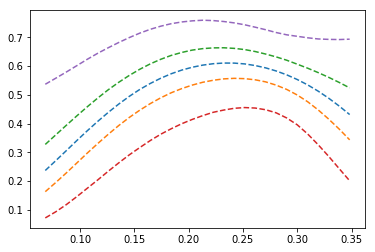

In [42]:
plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
plt.show()

In [43]:
np.unique(summary_stan['Z'].values)

array([0.06794   , 0.07760759, 0.08727517, 0.09694276, 0.10661034,
       0.11627793, 0.12594552, 0.1356131 , 0.14528069, 0.15494828,
       0.16461586, 0.17428345, 0.18395103, 0.19361862, 0.20328621,
       0.21295379, 0.22262138, 0.23228897, 0.24195655, 0.25162414,
       0.26129172, 0.27095931, 0.2806269 , 0.29029448, 0.29996207,
       0.30962966, 0.31929724, 0.32896483, 0.33863241, 0.3483    ])

In [44]:
chosen_z = np.unique(summary_stan['Z'].values)[5]

In [45]:
chosen_z

0.11627793103448275

In [46]:
subset_temp = summary_stan[summary_stan['Z']==chosen_z]

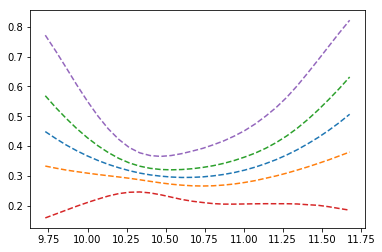

In [47]:
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['50%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['25%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['75%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['97.5%'], '--')
plt.show()

In [48]:
# %matplotlib notebook

NameError: name 'prob01_stan' is not defined

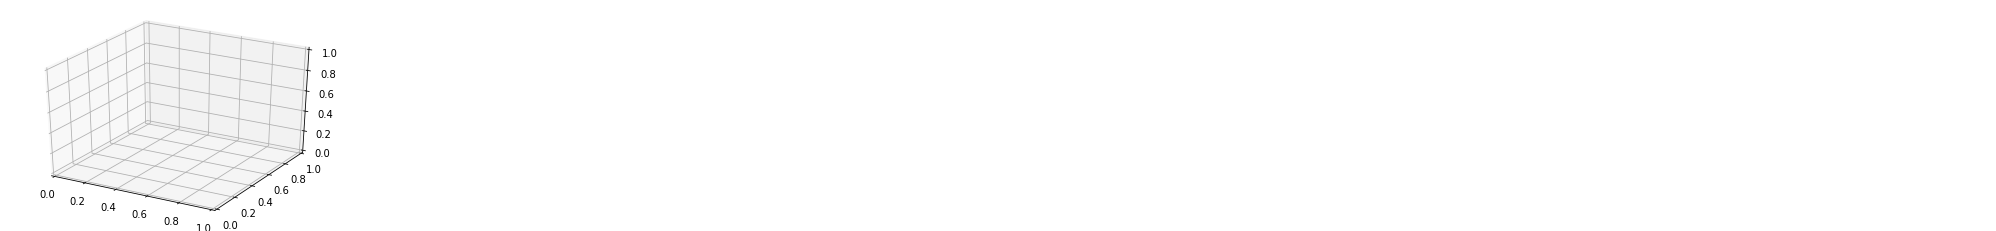

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
plt.show()

In [ ]:
prob01.boxplot(column='50%')

In [ ]:
prob01_stan.boxplot(column='50%')

# Last check to be 100% sure (for one class - class 1 - lineless)

In [ ]:
m = 0.01
z = np.arange(0., 0.35, 0.01)
p = posteriors

In [ ]:
# regression = []
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))
        
        
        
        
        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [ ]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [ ]:
idx = np.where(beta<=10)

In [ ]:
plt.plot(redsh[idx], prob[idx], '-', alpha=0.8)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()